<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_June_25/blob/main/Intermediate_Assessment_02_DSA_June_25_Manju_Vijayakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HR Analytics Practice Problem**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
# Load the train and test dataset
train_df= pd.read_csv('/content/sample_data/train_LZdllcl.csv')
test_df= pd.read_csv('/content/sample_data/test_2umaH9m.csv')

In [4]:
# train_df first 5 rows
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train_df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [8]:
# Target column is_promoted
train_df.is_promoted.value_counts(1)

,proportion
is_promoted,
0,0.91483
1,0.08517


In [9]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
# Rename column name for ease of access

train_df= train_df.rename(columns= {'KPIs_met >80%' : 'kpis_met_gt80',
                                     'awards_won?' : 'awards_won'})

train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met_gt80', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
# Data preprocessing

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  kpis_met_gt80         54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
print('Dataset has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))

Dataset has 54808 rows and 14 columns


In [14]:
# Missing values
train_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [15]:
# Missing value in features: education and previous_year_rating

In [16]:
# Statistical analysis of numerical features
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_gt80,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [17]:
# Analyzing education
train_df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [22]:
train_df.education.value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


In [24]:
train_df.education.isna().sum()

np.int64(2409)

In [25]:
# Imputing Education feature with mode()
train_df.education= train_df.education.fillna(train_df.education.mode()[0])
train_df.education.isna().sum()

np.int64(0)

In [28]:
# Analyzing previous_year_rating
train_df.previous_year_rating.skew()

np.float64(-0.3106378431385327)

In [29]:
# Median can be used for imputation
train_df.previous_year_rating= train_df.previous_year_rating.fillna(train_df.previous_year_rating.median())
train_df.previous_year_rating.isna().sum()

np.int64(0)

In [31]:
# Check for duplicates
train_df.duplicated().sum()

np.int64(0)

In [33]:
# No duplicates available in the training dataset

In [34]:
# Datatype count
print('Datatype of features : \n', train_df.dtypes.value_counts())

Datatype of features : 
 int64      8
object     5
float64    1
Name: count, dtype: int64


In [35]:
# Encoding the object datatypes

In [39]:
for col in train_df.select_dtypes(include= ['object']):
  print(train_df[col].value_counts())

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

In [41]:
# Dropping employee_id and region

train_df_original = train_df.copy()

train_df = train_df.drop(columns= ['employee_id', 'region'], axis= 1)
train_df.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'kpis_met_gt80', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [42]:
# Encoding the object features
train_df= pd.get_dummies(train_df, dtype= 'int')
train_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_gt80,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


**Exploratory Data Analysis**

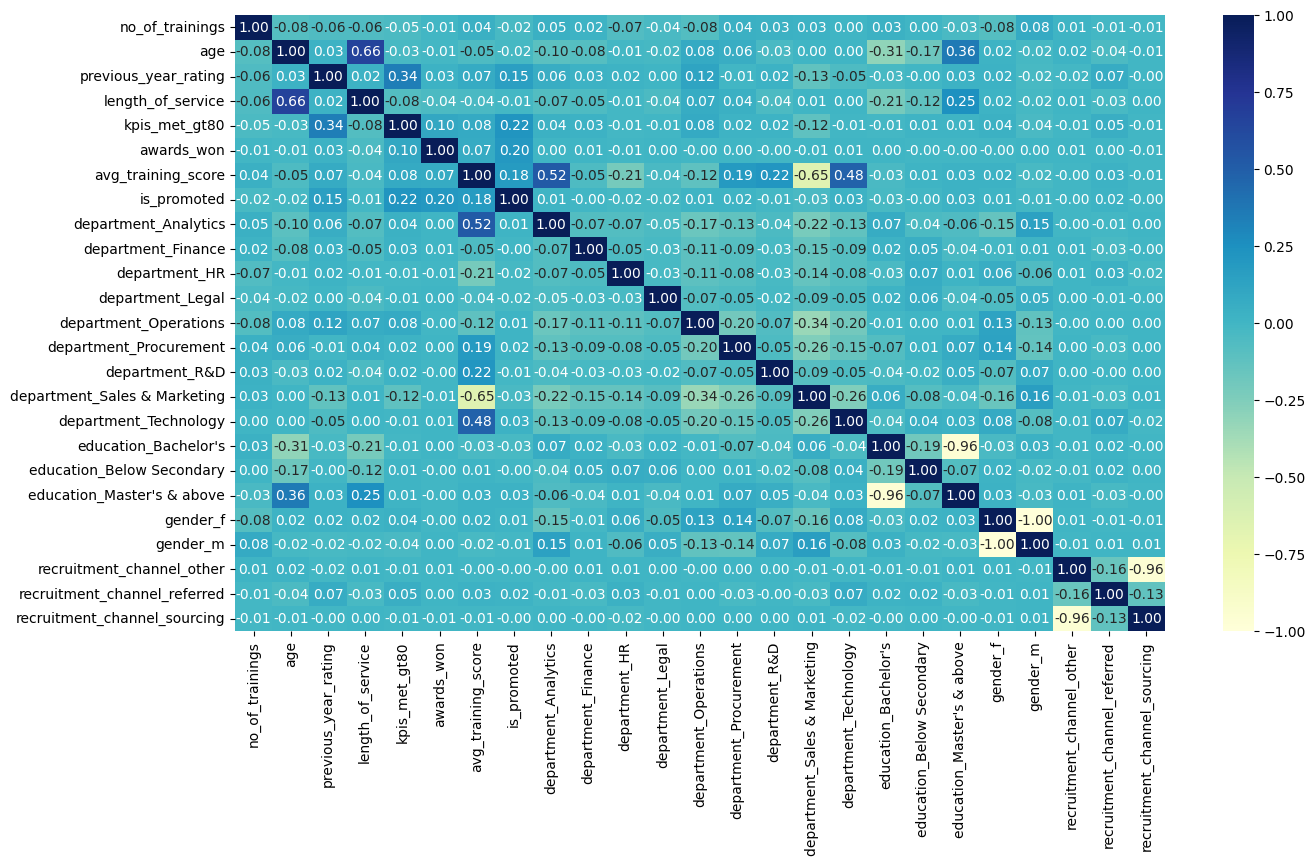

In [43]:
# Check the correlation
plt.figure(figsize = (15, 8))
sns.heatmap(train_df.corr(), annot= True, cmap= 'YlGnBu', fmt = '.2f')
plt.show()

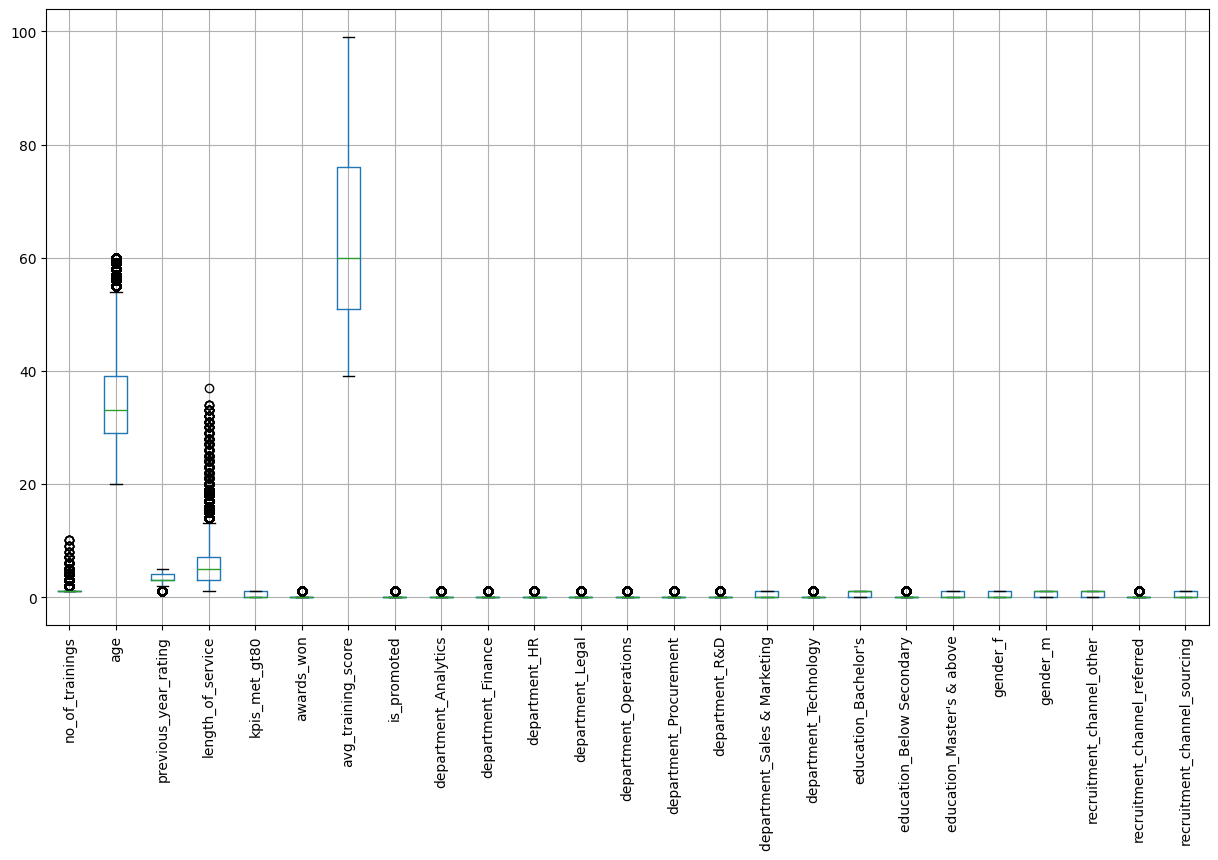

In [48]:
# Outlier checking
plt.figure(figsize = (15, 8))
train_df.boxplot()
plt.xticks(rotation= 90)
plt.show()

In [49]:
# There exists outliers in most of the features

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_gt80,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54808 non-null  int64  
 1   age                           54808 non-null  int64  
 2   previous_year_rating          54808 non-null  float64
 3   length_of_service             54808 non-null  int64  
 4   kpis_met_gt80                 54808 non-null  int64  
 5   awards_won                    54808 non-null  int64  
 6   avg_training_score            54808 non-null  int64  
 7   is_promoted                   54808 non-null  int64  
 8   department_Analytics          54808 non-null  int64  
 9   department_Finance            54808 non-null  int64  
 10  department_HR                 54808 non-null  int64  
 11  department_Legal              54808 non-null  int64  
 12  department_Operations         54808 non-null  int64  
 13  d

**Modeling**

In [52]:
X= train_df.drop(['is_promoted'], axis= 1)
y= train_df.is_promoted

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38365, 24) (16443, 24) (38365,) (16443,)


In [54]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [55]:
models= {
          'Random Forest' : RandomForestClassifier(n_estimators= 100, random_state= 42),
          'Gradient Boosting' : GradientBoostingClassifier(random_state= 42),
          'XGBoost' : XGBClassifier(random_state= 42)
        }

In [60]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  y_proba= model.predict_proba(X)
  accuracy= accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred)
  print('Model : {}'.format(name))
  print('F1 Score :{}'.format(f1score))
  print('Accuracy : {}'.format(accuracy))
  print('Precision : {}'.format(precision))
  print('-' * 25)


Model : Random Forest
F1 Score :0.4514811031664964
Accuracy : 0.9346834519248313
Precision : 0.7072
-------------------------
Model : Gradient Boosting
F1 Score :0.4890633763320247
Accuracy : 0.9445964848263699
Precision : 0.9688888888888889
-------------------------
Model : XGBoost
F1 Score :0.510752688172043
Accuracy : 0.94465730097914
Precision : 0.9013282732447818
-------------------------


XGBoost has come up with an accuracy of 0.95 and and F1 score of 0.51 which indicates a model with moderate performance, meaning it has both some correct predictions (precision) and some missed positive cases (recall), but neither is high enough to achieve a better score.

In [57]:
# Train test score using XGBoost

xgb_cls= XGBClassifier(random_state= 42)
xgb_cls= xgb_cls.fit(X_train, y_train)

y_train_predict= xgb_cls.predict(X_train)
y_test_predict= xgb_cls.predict(X_test)

xgb_train_score = accuracy_score(y_train, y_train_predict)
xgb_test_score= accuracy_score(y_test, y_test_predict)

print('XGB Training score : {}'.format(xgb_train_score))
print('XGB Test score: {}'.format(xgb_test_score))

XGB Training score : 0.9479994786915157
XGB Test score: 0.94465730097914


In [59]:
f1_score(y_test, y_test_predict)

0.510752688172043

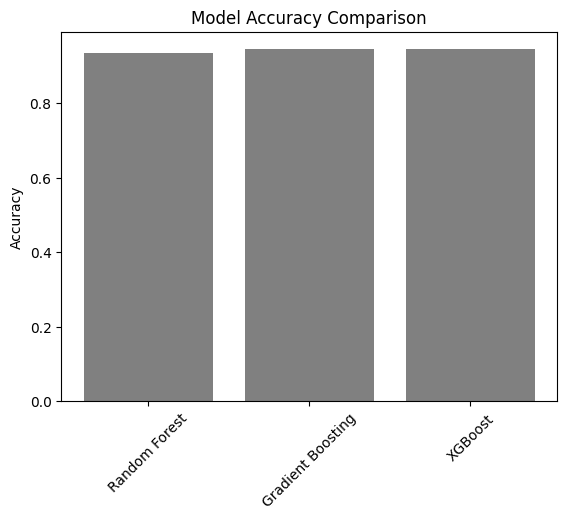

In [58]:
# Model accuracy comparison

model_names= list(models.keys())
accuracies= [model.score(X_test, y_test) for model in models.values()]

plt.bar(model_names, accuracies, color= 'grey')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation= 45)
plt.show()

In [63]:
# Stratified cross validation to check for any betterment in score

from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold_model= StratifiedKFold(n_splits = 10 )  #10 fold cross validation

cv_result= cross_val_score(xgb_cls, X, y, cv= skfold_model)

cv_result

array([0.94161649, 0.94198139, 0.94015691, 0.94143404, 0.93942711,
       0.94252874, 0.94344098, 0.94344098, 0.94251825, 0.93978102])

In [64]:
# Accuracy seems to be stable

**Preprocessing of Test dataset**

In [65]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [66]:
# Renaming the column names
test_df= test_df.rename(columns= {'KPIs_met >80%' : 'kpis_met_gt80',
                                     'awards_won?' : 'awards_won'})

test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met_gt80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [67]:
# Dataset information
print('Test dataset has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

Test dataset has 23490 rows and 13 columns


In [68]:
# Missing values
test_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [69]:
# Missing values in education and previous_year_rating
# Imputing education with mode and previous_year_rating with median

test_df.education= test_df.education.fillna(test_df.education.mode()[0])
test_df.previous_year_rating= test_df.previous_year_rating.fillna(test_df.previous_year_rating.median())

test_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [70]:
# Check for duplicates
test_df.duplicated().sum()

np.int64(0)

In [71]:
# Datatype count
print('Datatype of features : \n', test_df.dtypes.value_counts())

Datatype of features : 
 int64      7
object     5
float64    1
Name: count, dtype: int64


In [72]:
# Encoding object features

In [73]:
# Dropping employee_id and region

test_df_original = test_df.copy()

test_df = test_df.drop(columns= ['employee_id', 'region'], axis= 1)
test_df.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'kpis_met_gt80', 'awards_won', 'avg_training_score'],
      dtype='object')

In [74]:
test_df= pd.get_dummies(test_df, dtype= 'int')
test_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_gt80,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [78]:
print(train_df.shape)
print(test_df.shape)

(54808, 25)
(23490, 24)


In [79]:
# Predicting test dataset using XGBClassifier model

y_test_xgb_pred= xgb_cls.predict(test_df)

In [80]:
y_test_xgb_pred

array([0, 0, 0, ..., 0, 0, 1])

In [81]:
sample_sub_file= pd.read_csv('/content/sample_data/sample_submission_M0L0uXE.csv')
sample_sub_file.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [85]:
# Appending the prediction to sample submission file
sample_sub_file.is_promoted= xgb_cls.predict(test_df)

In [86]:
sample_sub_file.is_promoted.value_counts()

,count
is_promoted,
0,22737
1,753


In [87]:
sample_sub_file.is_promoted.value_counts(1)

,proportion
is_promoted,
0,0.967944
1,0.032056


In [90]:
# Saving the submission file
from google.colab import files

sample_sub_file.to_csv('sample_submission_M0L0uXE.csv', index= False)

**Hyper parameter fine tuning**

In [93]:
# Hyper parameter fine tuning

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [8, 9, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_cls_1= XGBClassifier(random_state= 42)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_cls_1, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.7}
Best score:  0.5068110143378645


In [95]:
# Train test score using XGBoost

xgb_cls_ft = XGBClassifier(random_state= 42, learning_rate= 0.1, max_depth= 10, subsample= 0.7)
xgb_cls_ft = xgb_cls_ft.fit(X_train, y_train)

y_train_ft_predict= xgb_cls_ft.predict(X_train)
y_test_ft_predict= xgb_cls_ft.predict(X_test)

xgb_train_ft_score = accuracy_score(y_train, y_train_predict)
xgb_test_ft_score= accuracy_score(y_test, y_test_predict)
xgb_ft_f1_score= f1_score(y_test_ft_predict, y_test_predict)

print('XGB Training score : {}'.format(xgb_train_ft_score))
print('XGB Test score: {}'.format(xgb_test_ft_score))

print('XGB F1 score: {}'.format(xgb_ft_f1_score))

XGB Training score : 0.9479994786915157
XGB Test score: 0.94465730097914
XGB F1 score: 0.9180633147113594


In [96]:
sample_sub_file_1 = sample_sub_file.copy()

# Appending the prediction to sample submission file
sample_sub_file.is_promoted= xgb_cls_ft.predict(test_df)

In [99]:
sample_sub_file.is_promoted.value_counts(1)

,proportion
is_promoted,
0,0.967263
1,0.032737


In [100]:
# Saving the submission file
from google.colab import files

sample_sub_file.to_csv('sample_submission_M0L0uXE.csv', index= False)